Lambda School Data Science, Unit 2: Predictive Modeling

# Kaggle Challenge, Module 1

## Assignment
- [ ] Do train/validate/test split with the Tanzania Waterpumps data.
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what other columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What other columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [ ] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [ ] Get your validation accuracy score.
- [ ] Get and plot your feature importances.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this classification problem, you may want to use the parameter `logistic=True`, but it can be slow.

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```


In [2]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [8]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [16]:
from sklearn.model_selection import train_test_split
import numpy as np
my_train, my_val = train_test_split(train, random_state=7)

In [17]:
my_train.shape,my_val.shape , test.shape

((44550, 41), (14850, 41), (14358, 40))

In [18]:
test.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [19]:
my_train.T

,15679,23720,16743,58120,12000,13231,55447,42787,10547,13067,...,2583,56718,34140,13927,919,53459,38467,10742,49689,58564
id,26812,42639,20763,12430,51431,26626,34184,4644,14005,28046,...,12094,74029,34142,64459,25000,41022,8738,49797,41166,44086
amount_tsh,50,0,0,500,0,0,0,1000,0,0,...,0,0,0,100,0,10,200,0,0,20
date_recorded,2013-01-26,2011-03-25,2013-02-27,2011-03-22,2012-10-18,2011-04-09,2011-03-27,2013-01-18,2013-01-22,2011-03-12,...,2012-10-26,2011-04-17,2011-02-26,2011-08-04,2012-10-26,2013-01-17,2011-08-07,2011-07-25,2011-07-09,2013-03-12
funder,Government Of Tanzania,Government Of Tanzania,Kiliwater,Unicef,World Vision,Government Of Tanzania,Wananchi,Aic Church,Government Of Tanzania,Government Of Tanzania,...,Hesawa,Government Of Tanzania,Government Of Tanzania,Dasip,Care International,Kuwasa,Hesawa,Hifab,Hesawa,0
gps_height,328,478,1673,1492,0,0,1332,1225,123,1810,...,1519,0,378,1166,1523,914,1195,0,0,-27
installer,District Water Department,RWE,Kiliwater,DWE,Consuting Engineer,DISTRICT COUNCIL,wananchi,MASWI DRILL,DWE,DWE,...,Hesawa,Centr,RWE,DWE,Care international,KUWASA,DWE,Hesawa,DWE,0
longitude,38.5563,38.242,37.5826,34.713,33.0294,33.3826,34.6004,33.4967,39.051,38.2036,...,34.6158,35.8018,37.4563,33.0712,34.6153,29.6423,33.0562,33.3171,31.3432,39.3256
latitude,-10.195,-4.96329,-3.05435,-8.87864,-4.22354,-8.97695,-8.7906,-2.11834,-9.1083,-4.67152,...,-1.77749,-4.44221,-6.30464,-2.09279,-1.77945,-4.89122,-1.86174,-3.09813,-2.63952,-6.85615
wpt_name,Tankini,Banda La Mbuzi,Kwa August Shaban,Kwa Baraka Mdijulu,Kakola A,Izumbwe Primary School,Kwa Linus Mgeni,Kanisani Aic,Kwarashidi,Kwa Mzee Julius,...,Nyerere,Msikitini,Kwa Mangube,Kwasatu,Zahanati,Kwa Sizya Juma,Makanywele,Mbuwa A,Kagomelo,Kwa Gulue
num_private,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
my_train.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    2717
gps_height                   0
installer                 2737
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 286
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            2493
recorded_by                  0
scheme_management         2952
scheme_name              21150
permit                    2295
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [208]:
def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    X['gps_height'] = X['gps_height'].replace([-90], X['gps_height'].mean())
    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace the zeros with nulls, and impute missing values later.
    cols_with_zeros = ['longitude', 'latitude', 'construction_year']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
    X.date_recorded = X['date_recorded'].str[:4]#.astype('float64')
    X.construction_year = X['construction_year'].astype('str').str[:4].astype('float64')
    # quantity & quantity_group are duplicates, num_private has no discernible use.
    X = X.drop(columns=['quantity_group','num_private', 'recorded_by'])
    #x['']
    
    # return the wrangled dataframe
    return X


my_train1 = wrangle(my_train)
my_val1 = wrangle(my_val)
my_test = wrangle(test)

In [209]:
my_train1.describe()

,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year
count,44550.000000,44550.000000,44550.000000,43181.000000,43181.000000,44550.000000,44550.000000,44550.000000,28963.000000
mean,37159.076992,315.546327,667.811825,35.133310,-5.877494,15.303389,5.621549,180.245275,1996.873977
std,21461.767613,3219.954427,693.270891,2.607584,2.805292,17.556668,9.623465,481.499965,12.477099
min,1.000000,0.000000,-63.000000,29.607122,-11.649440,1.000000,0.000000,0.000000,1960.000000
25%,18560.250000,0.000000,0.000000,33.271827,-8.629996,5.000000,2.000000,0.000000,1988.000000
50%,37047.500000,0.000000,368.000000,34.988652,-5.170599,12.000000,3.000000,25.000000,2000.000000
75%,55703.750000,20.000000,1321.000000,37.211990,-3.371704,17.000000,5.000000,210.000000,2008.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-0.998464,99.000000,80.000000,30500.000000,2013.000000


In [210]:
#I will need to decide what is an outlier for this column

my_train1[my_train1.gps_height == -90]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,...,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group


In [211]:
my_train1.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height               float64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
scheme_management         object
scheme_name               object
permit                    object
construction_year        float64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_type              object
water_quality             object
quality_gr

In [212]:
# The status_group column is the target
target = 'status_group'

# Get a dataframe with all train columns except the target & id
train_features = my_train1.drop(columns=[target, 'id'])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality <= 50].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features
print(features)

['amount_tsh', 'gps_height', 'longitude', 'latitude', 'region_code', 'district_code', 'population', 'construction_year', 'date_recorded', 'basin', 'region', 'public_meeting', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group']


In [213]:
cardinality.sort_values()

permit                       2
public_meeting               2
source_class                 3
date_recorded                5
quantity                     5
management_group             5
quality_group                6
waterpoint_type_group        6
source_type                  7
waterpoint_type              7
extraction_type_class        7
payment_type                 7
payment                      7
water_quality                8
basin                        9
source                      10
scheme_management           12
management                  12
extraction_type_group       13
extraction_type             18
region                      21
lga                        124
funder                    1667
installer                 1869
ward                      2080
scheme_name               2495
subvillage               16692
wpt_name                 29034
dtype: int64

In [214]:
X_train = my_train1[features]
y_train = my_train1[target]
X_val = my_val1[features]
y_val = my_val1[target]
X_test = test[features]

In [215]:
#I can see that there is a high correlation between district code and region code. since one or the other account for
#67% of the other I have to consider what to do with them.
my_train1.corr()

,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year
id,1.000000,-0.006945,-0.001337,0.002118,0.000692,-0.003170,-0.003903,-0.001401,-0.005447
amount_tsh,-0.006945,1.000000,0.070177,0.011183,-0.044808,-0.025623,-0.023194,0.015396,0.006304
gps_height,-0.001337,0.070177,1.000000,-0.021667,0.022695,-0.183245,-0.169618,0.134066,-0.006168
longitude,0.002118,0.011183,-0.021667,1.000000,-0.298681,0.148597,0.253919,0.058754,0.026846
latitude,0.000692,-0.044808,0.022695,-0.298681,1.000000,-0.244129,-0.193016,0.002501,0.043603
region_code,-0.003170,-0.025623,-0.183245,0.148597,-0.244129,1.000000,0.676673,0.090709,-0.014536
district_code,-0.003903,-0.023194,-0.169618,0.253919,-0.193016,0.676673,1.000000,0.057317,0.006697
population,-0.001401,0.015396,0.134066,0.058754,0.002501,0.090709,0.057317,1.000000,0.029974
construction_year,-0.005447,0.006304,-0.006168,0.026846,0.043603,-0.014536,0.006697,0.029974,1.000000


In [216]:
X_train.corr()

,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year
amount_tsh,1.000000,0.070177,0.011183,-0.044808,-0.025623,-0.023194,0.015396,0.006304
gps_height,0.070177,1.000000,-0.021667,0.022695,-0.183245,-0.169618,0.134066,-0.006168
longitude,0.011183,-0.021667,1.000000,-0.298681,0.148597,0.253919,0.058754,0.026846
latitude,-0.044808,0.022695,-0.298681,1.000000,-0.244129,-0.193016,0.002501,0.043603
region_code,-0.025623,-0.183245,0.148597,-0.244129,1.000000,0.676673,0.090709,-0.014536
district_code,-0.023194,-0.169618,0.253919,-0.193016,0.676673,1.000000,0.057317,0.006697
population,0.015396,0.134066,0.058754,0.002501,0.090709,0.057317,1.000000,0.029974
construction_year,0.006304,-0.006168,0.026846,0.043603,-0.014536,0.006697,0.029974,1.000000


In [217]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='mean'), 
    StandardScaler(), 
    LogisticRegression(multi_class='auto', solver='lbfgs', n_jobs=-1)
)

# Fit on train
pipeline.fit(X_train, y_train)

# Score on val
print('Validation Accuracy', pipeline.score(X_val, y_val))

# Predict on test
y_pred = pipeline.predict(X_test)

Validation Accuracy 0.7360942760942761


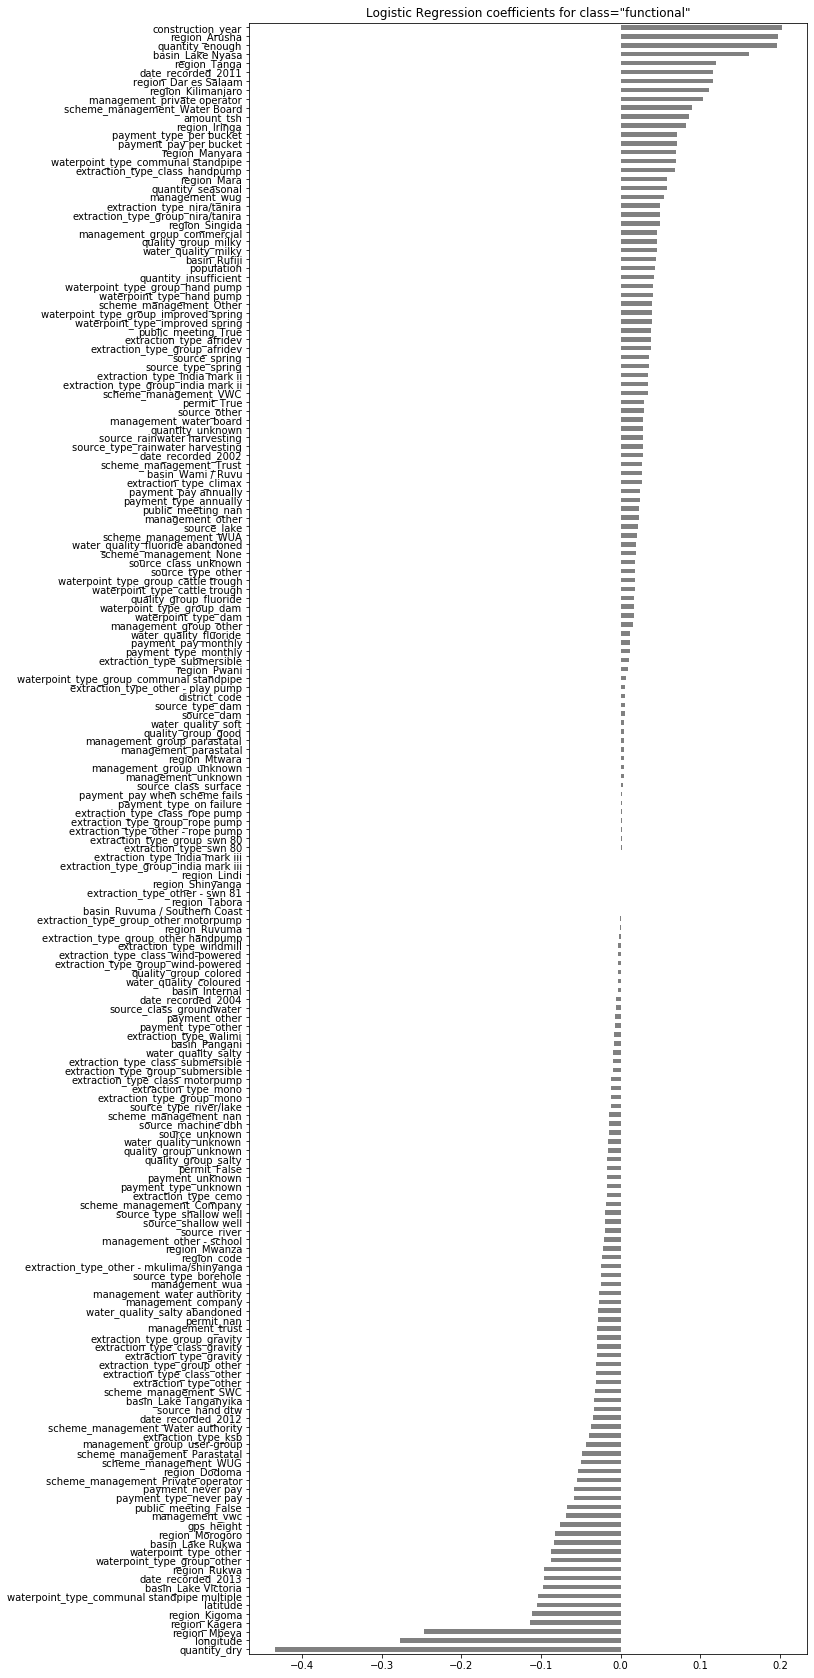

In [218]:
%matplotlib inline
import matplotlib.pyplot as plt

model = pipeline.named_steps['logisticregression']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns
coefficients = pd.Series(model.coef_[0], encoded_columns)
plt.figure(figsize=(10,30))
coefficients.sort_values().plot.barh(color='grey');
plt.title('Logistic Regression coefficients for class="functional"');

In [220]:
from sklearn.tree import DecisionTreeClassifier

# These are the only two changes from the previous code cell:
# Remove StandardScaler (it's not needed or helpful for trees)
# Change the model from LogisticRegression to DecisionTreeClassifier

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='mean'), 
    DecisionTreeClassifier(random_state=42)
)

# Fit on train
pipeline.fit(X_train, y_train)

# Score on train, val
print('Train Accuracy', pipeline.score(X_train, y_train))
print('Validation Accuracy', pipeline.score(X_val, y_val)

Train Accuracy 0.9956004489337823
Validation Accuracy 0.7537373737373737


In [226]:
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
)

pipeline.fit(X_train, y_train)
print('Train Accuracy', pipeline.score(X_train, y_train))
print('Validation Accuracy', pipeline.score(X_val, y_val))

Train Accuracy 0.8088888888888889
Validation Accuracy 0.7670707070707071


In [227]:
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(min_samples_leaf=40, random_state=42)
)

pipeline.fit(X_train, y_train)
print('Train Accuracy', pipeline.score(X_train, y_train))
print('Validation Accuracy', pipeline.score(X_val, y_val))

Train Accuracy 0.7851178451178451
Validation Accuracy 0.7559595959595959


In [228]:
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(min_samples_leaf=80, random_state=42)
)

pipeline.fit(X_train, y_train)
print('Train Accuracy', pipeline.score(X_train, y_train))
print('Validation Accuracy', pipeline.score(X_val, y_val))

Train Accuracy 0.7650953984287318
Validation Accuracy 0.7470707070707071


In [239]:
for max_depth in range(10,25,2):
    
    # Fit decision tree
    dt = make_pipeline(
        ce.OneHotEncoder(use_cat_names=True),
        SimpleImputer(), 
        DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    )
    dt.fit(X_train, y_train)
    print('Train Accuracy for ',max_depth, dt.score(X_train, y_train))
    print('Validation Accuracy',max_depth, dt.score(X_val, y_val), '\n\n')

Train Accuracy for  15 0.8363187429854096
Validation Accuracy 15 0.7663973063973064 


Train Accuracy for  17 0.8687317620650954
Validation Accuracy 17 0.7672053872053872 


Train Accuracy for  19 0.8969472502805836
Validation Accuracy 19 0.7667340067340067 


Train Accuracy for  21 0.923030303030303
Validation Accuracy 21 0.7653872053872054 


Train Accuracy for  23 0.9461503928170595
Validation Accuracy 23 0.7601346801346801 




In [240]:
for max_depth in range(1,101,10):
    
    # Fit decision tree
    dt = make_pipeline(
        ce.OneHotEncoder(use_cat_names=True),
        SimpleImputer(), 
        DecisionTreeClassifier(min_samples_leaf=max_depth, random_state=42)
    )
    dt.fit(X_train, y_train)
    print('Train Accuracy for ',max_depth, dt.score(X_train, y_train))
    print('Validation Accuracy',max_depth, dt.score(X_val, y_val), '\n\n')

Train Accuracy for  1 0.9956004489337823
Validation Accuracy 1 0.7537373737373737 


Train Accuracy for  11 0.8334680134680135
Validation Accuracy 11 0.7658585858585859 


Train Accuracy for  21 0.8071156004489338
Validation Accuracy 21 0.7671380471380471 


Train Accuracy for  31 0.7929517396184063
Validation Accuracy 31 0.7630303030303031 


Train Accuracy for  41 0.784736251402918
Validation Accuracy 41 0.7558249158249158 


Train Accuracy for  51 0.7804264870931538
Validation Accuracy 51 0.754006734006734 


Train Accuracy for  61 0.7746576879910213
Validation Accuracy 61 0.7564983164983164 


Train Accuracy for  71 0.7685970819304153
Validation Accuracy 71 0.7515151515151515 


Train Accuracy for  81 0.764983164983165
Validation Accuracy 81 0.7476094276094276 


Train Accuracy for  91 0.7619528619528619
Validation Accuracy 91 0.7455892255892256 




# I decided 61 in minimum leaf was a good breakpoint

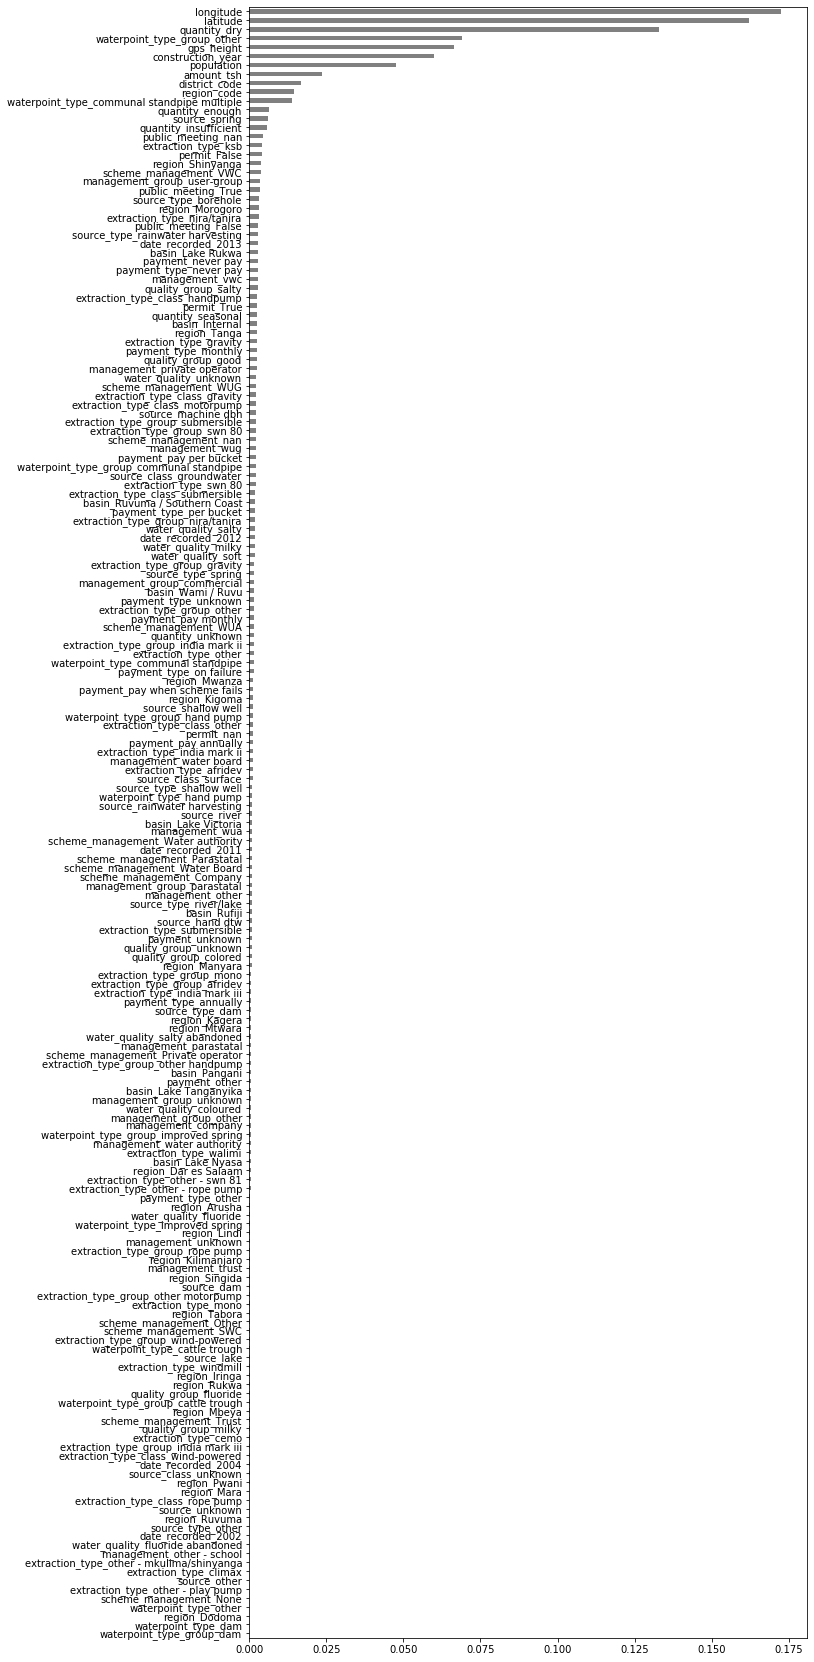

In [244]:
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns
importances = pd.Series(model.feature_importances_, encoded_columns)
plt.figure(figsize=(10,30))
importances.sort_values().plot.barh(color='grey');

In [258]:
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(min_samples_leaf=61, random_state=42)
)

pipeline.fit(X_train, y_train)
print('Train Accuracy', pipeline.score(X_train, y_train))
print('Validation Accuracy', pipeline.score(X_val, y_val))

y_pred = pipeline.predict(X_test)

Train Accuracy 0.7746576879910213
Validation Accuracy 0.7564983164983164


In [259]:
y_pred.shape

(14358,)

In [263]:
y_pred = pipeline.predict(X_test)
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('your-submission-filename.csv', index=False)

In [264]:
!kaggle competitions submit -c ds8-predictive-modeling-challenge -f your-submission-filename.csv -m "First submit through API"

Successfully submitted to DS8 Predictive Modeling Challenge



  0%|          | 0.00/279k [00:00<?, ?B/s]
 69%|######8   | 192k/279k [00:00<00:00, 1.79MB/s]
 89%|########8 | 248k/279k [00:00<00:00, 716kB/s] 
100%|##########| 279k/279k [00:01<00:00, 195kB/s]
